In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import math
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

NUMERICALS = ['GIAGE1', 'HA_HEIGHT', 'HA_WEIGHT', 'TUDRPRWK', 'B1FND', 'GRS_FN', 'HA_SMOKE_0.0', 'HA_SMOKE_1.0', 'HA_SMOKE_2.0', 'GIERACE_1.0',
              'GIERACE_2.0', 'GIERACE_3.0', 'GIERACE_4.0', 'GIERACE_5.0', 'CLINIC_1.0','CLINIC_2.0', 'CLINIC_3.0',  
              'CLINIC_4.0', 'CLINIC_5.0', 'CLINIC_6.0','NFWLKSPD_0.0', 'NFWLKSPD_1.0', 'NFWLKSPD_2.0']


# change allele to number
def allele_to_number(sample, attribute, sig_dict):
    return sample[attribute].count(sig_dict[attribute])


# fill numerical empty cells with median of the column, race with 1 (for white) and other categorical empty cells with the 0
def fill_empty_cell(sample, attribute, data):
    if pandas.isnull(sample[attribute]):
        if attribute in NUMERICALS:
            return data[attribute].median()
        return int(attribute == 'GIERACE' )
    elif attribute == 'FRAC':
        return int(sample['FAANYSLD'] or sample['FAANYWST'] or sample['FAANYHIP'])
    return sample[attribute]


# calculate GRS
#def load_weight(sheet):
#    weight = []
#    df = pandas.read_excel('Estrada_63.xlsx', sheet_name=sheet)
#    w = list(df)[-1]
#    for i in range(len(df)):
#        weight.append(df.iloc[i][w])
#    return weight

if __name__ == '__main__':
    data = pandas.read_excel('mros_1103snps.xlsx')
    # drop HA_SLDFXFU where only 10% is filled, drop subjectid,
    data.drop(['HA_SLDFXFU', 'TURSMOKE', 'HA_SLDFX', 'HA_WRSTFX'], axis=1, inplace=True)
    # make the fractures into 1 variable
    data['FRAC'] = 0
    for attribute in data.keys():
        data[attribute] = data.apply(lambda sample: fill_empty_cell(sample, attribute, data), axis=1)
    # drop the other fractured values
    data.drop(['FAANYSLD', 'FAANYWST', 'FAANYHIP'], axis=1, inplace=True)
    # encode the categorical data
    data = pandas.DataFrame(pandas.get_dummies(data, columns=['GIERACE', 'CLINIC', 'NFWLKSPD', 'HA_SMOKE']))
    features = list(data)[22:-6]
    # setting Y and X
    # Y_df = np.asarray(data['B1THD'], dtype="|S8")
    Y_df = data['B1FND']
    X_df = pandas.read_excel('ready_to_go.xlsx')
    #X_df = data.drop(['SUBJECTID', 'HA_LSD', 'B1THD', 'B1FND', 'B1TLD', 'BUAMEAN',
    #                   'FAHIPFV1', 'FASLDFV1', 'FAWSTFV1', 'EFSTATUS', 'FRAC',
    #                    'XMDSQGE1', 'XMSQGE2', 'HA_CALCIUM', 'HA_BMI'], axis=1)
    # weight_LS = load_weight('LS_sex-combined_beta')
   # feature_data = data[features]
    # weight_LS = pandas.DataFrame(pandas.Series(weight_LS, index=features, name=0))
    #weight_FN = load_weight('FN_sex-combined_beta')
    # X_df['GRS_LS'] = feature_data.dot(weight_LS)
   # X_df['GRS_FN'] = feature_data.dot(weight_FN)
   # X_df.drop(features, axis=1, inplace=True)
    # print(Y_df.shape)
    
    # X_df.to_csv('X_variables.csv')
    
    # Importing the continuous variable
    # cv = pandas.read_excel('contious_variable.xlsx')
    
    # mean_cv = numpy.mean(cv, axis=0)
    # std_cv = numpy.std(cv, axis=0)
    # stan_cv = (cv - mean_cv) / std_cv  # mean variance normalization
    
    # stan_cv.to_csv('norma_continu_var.csv')
    
    print(Y_df.head())
    print(X_df[1:1])
    print(X_df.shape)
    print(Y_df.shape)
    # save data
    with open('datamrosbmd1103_B1FND', 'wb') as data_file_handler:
        import pickle

        pickle.dump(
            dict(
                X=X_df,
                Y=Y_df
            ),
            data_file_handler
        )


0    0.785
1    0.657
2    0.739
3    0.938
4    0.975
Name: B1FND, dtype: float64
Empty DataFrame
Columns: [W_SCORE, GIAGE1, HA_HEIGHT, HA_WEIGHT, TUDRPRWK, QLFXST51, GIERACE_1.0, GIERACE_2.0, GIERACE_3.0, GIERACE_4.0, GIERACE_5.0, CLINIC_1.0, CLINIC_2.0, CLINIC_3.0, CLINIC_4.0, CLINIC_5.0, CLINIC_6.0, NFWLKSPD_0.0, NFWLKSPD_1.0, NFWLKSPD_2.0, HA_SMOKE_0.0, HA_SMOKE_1.0, HA_SMOKE_2.0]
Index: []

[0 rows x 23 columns]
(5130, 23)
(5130,)


Using TensorFlow backend.
W0528 12:25:57.380446 13028 deprecation_wrapper.py:119] From C:\Users\jungj7\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0528 12:25:57.391418 13028 deprecation_wrapper.py:119] From C:\Users\jungj7\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0528 12:25:57.393418 13028 deprecation_wrapper.py:119] From C:\Users\jungj7\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0528 12:25:57.409369 13028 deprecation_wrapper.py:119] From C:\Users\jungj7\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please

x_train shape: (4104, 23)
4104 train samples
1026 test samples
Train on 4104 samples, validate on 1026 samples
Epoch 1/100
4104/4104 [==============================] - 0s 52us/step - loss: 0.2876 - mean_squared_error: 0.2876 - mean_absolute_error: 0.4739 - val_loss: 0.0186 - val_mean_squared_error: 0.0186 - val_mean_absolute_error: 0.1051
Epoch 2/100
4104/4104 [==============================] - 0s 12us/step - loss: 0.0158 - mean_squared_error: 0.0158 - mean_absolute_error: 0.0976 - val_loss: 0.0151 - val_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0946
Epoch 3/100
4104/4104 [==============================] - 0s 11us/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0943 - val_loss: 0.0148 - val_mean_squared_error: 0.0148 - val_mean_absolute_error: 0.0934
Epoch 4/100
4104/4104 [==============================] - 0s 12us/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0935 - val_loss: 0.0146 - val_mean_squared_error: 0.0146 - v

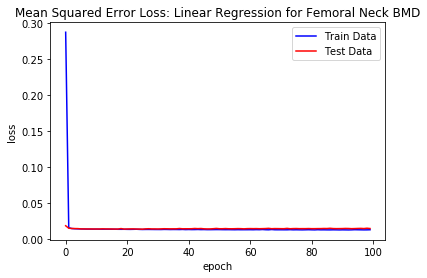

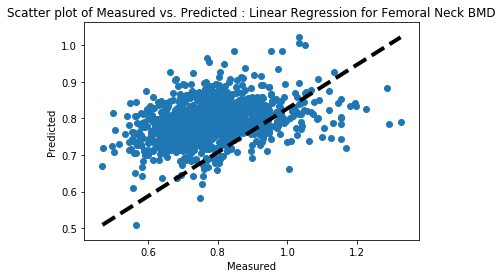

In [2]:
# Linear Regression

import pickle
import math
import numpy
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values


def linear_regression():
    model = Sequential()
    model.add(Dense(23, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model


def main(plot=True):
    # fix random seed for reproducibility
    # seed = 7

    # The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
    # numpy.random.seed(seed)
    # The below is necessary for starting core Python generated random numbers in a well-defined state.
    # rn.seed(seed)

    # according to keras documentation, numpy seed should be set before importing keras
    # information regarding setup for obtaining reproducible results using Keras during development in the following link https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

    # The below tf.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
    # tf.set_random_seed(seed)

    batch_size = 50
    # num_classes = 1
    # epochs = 50
    number_of_data = X.shape[0]
    number_of_train_data = int(.8 * number_of_data)
    # number_of_test_data = number_of_data - number_of_train_data

    # load dataset
    x_train, x_test = X[:number_of_train_data, :], X[number_of_train_data:, :]
    #mean_train_data = numpy.mean(train_data, axis=0)
    #std_train_data = numpy.std(train_data, axis=0)
    #x_train = (train_data - mean_train_data) / std_train_data  # mean variance normalization
    #x_test = (test_data - mean_train_data) / std_train_data  # mean variance normalization
    y_train, y_test = Y[:number_of_train_data], Y[number_of_train_data:]

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    
    # patient early stopping
    es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 50)
    , callbacks = [es]
    
    model = linear_regression()
    # history = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test, y_test))
    history = model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=100, validation_data=(x_test, y_test))
    print(history.history.keys())
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)

    score = model.evaluate(x_train, y_train, verbose=0)
    print('Train loss:', score)
    y_pred = model.predict(x_test)

    print('Mean Squared Error of test: ', mean_squared_error(y_test, y_pred))
    print('Mean Squared Error of train:', mean_squared_error(y_train, model.predict(x_train)))

    print('Mean Absolute Error of test: ', mean_absolute_error(y_test, y_pred))
    print('Mean Absolute Error of train: ', mean_absolute_error(y_train, model.predict(x_train)))

    print('Coefficient of Determination for test: ', r2_score(y_test, y_pred))
    print('Coefficient of Determination for train: ', r2_score(y_train, model.predict(x_train)))
    
    # print(type(x_train))
    #x_train.to_csv('x_train_B1FND.csv')
    #x_test.to_csv('x_test_B1FND.csv')
    #y_train.to_csv('y_train_B1FND.csv')
    #y_test_1 = pd.Series(y_test)
    numpy.savetxt('y_test.csv', y_test, delimiter=',')
    
    #y_pred_1 = pd.Series(y_pred)
    #y_test_1 = pd.Series(y_test)
    numpy.savetxt('y_pred.csv', y_pred, delimiter=',')
    
    #s = pd.Series(mean_train_data)
    #s.to_csv('mean_train_data.csv')
    
    #t = pd.Series(x_train)
    print(x_train[0])
    
    if not plot:
        return history.history['loss'], history.history['val_loss']
    pyplot.plot(history.history['loss'], 'b-')
    pyplot.plot(history.history['val_loss'], 'r-')
    pyplot.title('Mean Squared Error Loss: Linear Regression for Femoral Neck BMD')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['Train Data', 'Test Data'], loc='upper right')
    pyplot.savefig('reg_B1FND_MSE')
    pyplot.show()

    # Plot the predicted value against the actual value
    fig, ax = pyplot.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
    pyplot.title('Scatter plot of Measured vs. Predicted : Linear Regression for Femoral Neck BMD')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.savefig('reg_B1FND_scatter')
    pyplot.show()
    
if __name__ == '__main__':
    main()


In [ ]:
from scipy.stats import pearsonr
# Find the correlation between actual BMD and predicted BMD
corr = pearsonr(y_test, y_pred)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
# Wilcoxon signed-rank test with 10 fold CV

# Linear Regression
from multiscorer import MultiScorer
import pickle
import math
import numpy
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score, KFold

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, y = data.get('X', []).values, data.get('Y', []).values


def linear_regression():
    model = Sequential()
    model.add(Dense(23, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

model1 = linear_regression()

# Random Forest
class RandomForestRegressorCustom(RandomForestRegressor):
    def score(self, X, y, sample_weight=None):
        """Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True values for X.

        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.

        Returns
        -------
        score : float
            R^2 of self.predict(X) wrt. y.
        """

        return mean_squared_error(y, self.predict(X))

def create_model(epoch):
    return RandomForestRegressorCustom(n_estimators=epoch, random_state = 42, warm_start=True, oob_score=True, max_features='sqrt', max_depth=2)

epoch = 100
model2 = create_model(epoch)

kf = KFold(n_splits=10, random_state=42)

# Extract results for each model on the same folds
result_model1 = cross_val_score(model1, X, y, scoring = 'accuracy', cv = kf)
result_model2 = cross_val_score(model2, X, y,scoring = 'accuracy', cv = kf)

# Calculate p value
stat, p = wilcoxon(results_model1, results_model2, zero_method='zsplit'); p





In [ ]:
# Random Forest

import pickle

import numpy
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.legend_handler import HandlerLine2D
    
with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

# fix random seed for reproducibility
# seed = 7

# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
# numpy.random.seed(seed)
# The below is necessary for starting core Python generated random numbers in a well-defined state.
# random.seed(seed)

# The below tensorflow.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
# tensorflow.set_random_seed(seed)
# Y = label_binarize(Y, classes=[0,1])

batch_size = 10
num_classes = 2


number_of_data = X.shape[0]
number_of_train_data = int(.8 * number_of_data)
number_of_test_data = number_of_data - number_of_train_data

x_train, x_test = X[:number_of_train_data, :], X[number_of_train_data:, :]
#mean_train_data = numpy.mean(train_data, axis=0)
#std_train_data = numpy.std(train_data, axis=0)
#x_train = (train_data - mean_train_data) / std_train_data  # mean variance normalization
#x_test = (test_data - mean_train_data) / std_train_data  # mean variance normalization
y_train, y_test = Y[:number_of_train_data], Y[number_of_train_data:]

RANDOM_STATE = 42
n_estimators = 1


# override the RandomForestRegressor library
class RandomForestRegressorCustom(RandomForestRegressor):
    def score(self, X, y, sample_weight=None):
        """Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True values for X.

        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.

        Returns
        -------
        score : float
            R^2 of self.predict(X) wrt. y.
        """

        return mean_squared_error(y, self.predict(X))

#warm_start=True, oob_score=True, max_features='sqrt',

def create_model(epoch):
    return RandomForestRegressorCustom(n_estimators=epoch, random_state = 42, warm_start=True, oob_score=True, max_features='sqrt', max_depth=2)


def main(plot=True):
    epoch = 100
    model = create_model(epoch)
    model.fit(x_train, y_train)
    model.score(x_test, y_test)
    print(model.score(x_test, y_test), ' SOE')

    train_score, test_score = [], []

    for i in range(epoch):
        model = create_model(i + 1)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
#     print(test_score, ' TEST SCORE')
#     print(train_score, ' TRAIN SCORE')

    print('Mean Square Error of test: ', mean_squared_error(y_test, model.predict(x_test)))
    print('Mean Square Error of train: ', mean_squared_error(y_train, model.predict(x_train)))
    
    print('Mean Absolute Error of test: ', mean_absolute_error(y_test, model.predict(x_test))) 
    print('Mean Absolute Error of train: ', mean_absolute_error(y_train, model.predict(x_train)))

    print('Coefficient of Determination for test: ', r2_score(y_test, model.predict(x_test)))
    print('Coefficient of Determination for train: ', r2_score(y_train, model.predict(x_train)))

    # Print out the max depth
#     max_depths = numpy.linspace(1, 100, 100, endpoint=True)
#     train_results = []
#     test_results = []
    
#     for max_depth in max_depths:
#         rf = RandomForestRegressorCustom(max_depth=max_depth, n_jobs=-1)
#         rf.fit(x_train, y_train)
#         train_pred = rf.predict(x_train)
#         y_pred = rf.predict(x_test)

   
#     line1, = pyplot.plot(max_depths, train_score, 'b', label="Train MSE")
#     line2, = pyplot.plot(max_depths, test_score, 'r', label="Test MSE")
#     pyplot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#     pyplot.ylabel('MSE score')
#     pyplot.xlabel('Tree depth')
#     pyplot.show()
#     pyplot.savefig('rf_depthcheck_B1FND')
#     pyplot.show()
    y_pred = model.predict(x_test)
    numpy.savetxt('rf_y_pred_FNBMD.csv', y_pred, delimiter=',')
    
    if not plot:
        return train_score, test_score
    pyplot.plot(range(epoch), train_score, 'b-')
    pyplot.plot(range(epoch), test_score, 'r-')
    pyplot.title('Mean Squared Error Loss: Random Forest Regression for Femoral Neck BMD')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['Train Data', 'Test Data'], loc='upper right')
    pyplot.savefig('rf_B1FND_MSE')
    pyplot.show()
    
   
    
    # Plot the predicted value against the actual value
    fig, ax = pyplot.subplots()
    ax.scatter(y_test, model.predict(x_test))
    ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
    pyplot.title('Scatter plot of Measured vs. Predicted : Random Forest for Femoral Neck BMD')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.savefig('rf_B1FND_scatter')
    pyplot.show()

if __name__ == '__main__':
    main()


In [ ]:
# Gradient Boosting

import pickle
from matplotlib import pyplot
import numpy

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values


def create_model():
    return RandomForestRegressor(n_estimators=35, verbose=1)


def main(plot=True):
    # fix random seed for reproducibility
    # seed = 7
    # The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
    # numpy.random.seed(seed)
    # The below is necessary for starting core Python generated random numbers in a well-defined state.
    # random.seed(seed)

    # The below tf.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
    # tf.set_random_seed(seed)
    # Y = label_binarize(Y, classes=[0,1])

    # batch_size = 120
    # num_classes = 2
    # epochs = 15

    number_of_data = X.shape[0]
    number_of_train_data = int(.8 * number_of_data)
    # number_of_test_data = number_of_data - number_of_train_data

    # load dataset for MLP
    x_train, x_test = X[:number_of_train_data, :], X[number_of_train_data:, :]
    # mean_train_data = numpy.mean(train_data, axis=0)
    # std_train_data = numpy.std(train_data, axis=0)
    # x_train = (train_data - mean_train_data) / std_train_data  # mean variance normalization
    # x_test = (test_data - mean_train_data) / std_train_data  # mean variance normalization
    y_train, y_test = Y[:number_of_train_data], Y[number_of_train_data:]

    model = create_model()

    validatescores = cross_val_score(model, x_train, y_train)
    print(validatescores, ' ALL TRY')

    history = model.fit(x_train, y_train)
    print(history.feature_importances_)
    print(history, ' HISTORY')
    # y_pred = model.predict(x_test)

    params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
    gbr = GradientBoostingRegressor(**params)
    gbr.fit(x_train, y_train)

    test_score = numpy.zeros((params['n_estimators'],), dtype=numpy.float64)
    mse = mean_squared_error(y_test, gbr.predict(x_test))

    print('Mean Square Error of test: ', mean_squared_error(y_test, gbr.predict(x_test)))
    print('Mean Square Error of train: ', mean_squared_error(y_train, gbr.predict(x_train)))
   
    print('Mean Absolute Error of test: ', mean_absolute_error(y_test, model.predict(x_test)))
    print('Mean Absolute Error of train: ', mean_absolute_error(y_train, model.predict(x_train)))
    
    print('Coefficient of Determination for test: ', r2_score(y_test, gbr.predict(x_test)))
    print('Coefficient of Determination for train: ', r2_score(y_train, gbr.predict(x_train)))

    for i, y_pred in enumerate(gbr.staged_predict(x_test)):
        test_score[i] = gbr.loss_(y_test, y_pred)
    if not plot:
        return gbr.train_score_, test_score
    pyplot.figure()
    pyplot.title('Mean Square Error Loss: Gradient Boosting for Femoral Neck BMD')
    pyplot.plot(numpy.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-', label='Training')
    pyplot.plot(numpy.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test')
    pyplot.legend(loc='upper right')
    pyplot.legend(loc='upper right')
    pyplot.xlabel('epoch')
    pyplot.ylabel('Loss')
    pyplot.savefig('gb_B1FND_MSE')
    pyplot.show()
    
    y_pred = gbr.predict(x_test)
    numpy.savetxt('gb_y_pred_FNBMD.csv', y_pred, delimiter=',')
    
    # Plot the predicted value against the actual value
    fig, ax = pyplot.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
    pyplot.title('Scatter plot of Measured vs. Predicted : Gradient Boosting for Femoral Neck BMD')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.savefig('gb_B1FND_scatter')
    pyplot.show()


if __name__ == '__main__':
    main()


In [ ]:
# MLP

import pickle

import numpy
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values


def mlp():
    model = Sequential()
    model.add(Dense(30, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=10, kernel_initializer='normal', activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model


def main(plot=True):
    # fix random seed for reproducibility
    # seed = 7

    # The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
    # numpy.random.seed(seed)
    # The below is necessary for starting core Python generated random numbers in a well-defined state.
    # rn.seed(seed)

    # according to keras documentation, numpy seed should be set before importing keras information regarding setup for obtaining reproducible results using Keras during development in the following link https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

    # The below tf.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
    # tf.set_random_seed(seed)

    batch_size = 50
    # num_classes = 1
    # epochs = 50
    number_of_data = X.shape[0]
    number_of_train_data = int(.8 * number_of_data)
    # number_of_test_data = number_of_data - number_of_train_data

    # load dataset
    x_train, x_test = X[:number_of_train_data, :], X[number_of_train_data:, :]
    # mean_train_data = numpy.mean(train_data, axis=0)
    # std_train_data = numpy.std(train_data, axis=0)
    # x_train = (train_data - mean_train_data) / std_train_data  # mean variance normalization
    # x_test = (test_data - mean_train_data) / std_train_data  # mean variance normalization
    y_train, y_test = Y[:number_of_train_data], Y[number_of_train_data:]

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')

    # patient early stopping
    es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 50)
    , callbacks = [es]
    
    model = mlp()
    # history = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test, y_test))
    history = model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=100, validation_data=(x_test, y_test))
    print(history.history.keys())
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score)

    score = model.evaluate(x_train, y_train, verbose=0)
    print('Train loss:', score)
    y_pred = model.predict(x_test)
    
    numpy.savetxt('mlp_y_pred_FNBMD.csv', y_pred, delimiter=',')

    print('Mean Squared Error of test: ', mean_squared_error(y_test, y_pred))
    print('Mean Squared Error of train: ', mean_squared_error(y_train, model.predict(x_train)))

    print('Mean Absolute Error of test: ', mean_absolute_error(y_test, y_pred))
    print('Mean Absolute Error of train: ', mean_absolute_error(y_train, model.predict(x_train)))

    print('Coefficient of Determination for test: ', r2_score(y_test, y_pred))
    print('Coefficient of Determination for train: ', r2_score(y_train, model.predict(x_train)))

    if not plot:
        return history.history['loss'], history.history['val_loss']
    pyplot.plot(history.history['loss'], 'b-')
    pyplot.plot(history.history['val_loss'], 'r-')
    pyplot.title('Mean Squared Error Loss: MLP for Femoral Neck BMD')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['Train Data', 'Test Data'], loc='upper right')
    pyplot.savefig('mlp_B1FND_MSE')
    pyplot.show()
    
    # Plot the predicted value against the actual value
    fig, ax = pyplot.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
    pyplot.title('Scatter plot of Measured vs. Predicted : MLP for Femoral Neck BMD')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    pyplot.savefig('mlp_B1FND_scatter')
    pyplot.show()

if __name__ == '__main__':
    main()


In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for linear vs. random forest

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.evaluate import paired_ttest_5x2cv

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=linear,
                          estimator2=rf,
                          X=X, y=Y,
                          random_seed=1)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)

In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for linear vs. gb

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.evaluate import paired_ttest_5x2cv

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=linear,
                          estimator2=gb,
                          X=X, y=Y,
                          random_seed=2)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)

In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for rf vs. gb

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.evaluate import paired_ttest_5x2cv

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=rf,
                          estimator2=gb,
                          X=X, y=Y,
                          random_seed=1)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)

In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for linear vs. mlp

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.evaluate import paired_ttest_5x2cv

from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from keras import optimizers

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

def mlp():
    model = Sequential()
    model.add(Dense(30, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=10, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

mlp = mlp()
linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=linear,
                          estimator2=mlp,
                          X=X, y=Y,
                          random_seed=2)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)

In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for rf vs. mlp

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.evaluate import paired_ttest_5x2cv

from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from keras import optimizers

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

def mlp():
    model = Sequential()
    model.add(Dense(30, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=10, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

mlp = mlp()
linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=rf,
                          estimator2=mlp,
                          X=X, y=Y,
                          random_seed=2)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)

In [ ]:
# Testing of regression ML model by using 5 * 2 cv paired t test for gb vs. mlp

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense

from mlxtend.evaluate import paired_ttest_5x2cv

from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from keras import optimizers

with open('datamrosbmd1103_B1FND', 'rb') as file_handler:
    data = pickle.load(file_handler)
    X, Y = data.get('X', []).values, data.get('Y', []).values

def mlp():
    model = Sequential()
    model.add(Dense(30, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=10, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

mlp = mlp()
linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()


t, p = paired_ttest_5x2cv(estimator1=gb,
                          estimator2=mlp,
                          X=X, y=Y,
                          random_seed=2)

print("t statistic: %.5f" % t)
print("p avlue: %.5f" % p)